In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
img_array = cv2.imread("training/0/Training_3908.jpg")

In [3]:
img_array.shape #rgb

(48, 48, 3)

In [4]:
print(img_array)

[[[163 163 163]
  [128 128 128]
  [114 114 114]
  ...
  [139 139 139]
  [141 141 141]
  [134 134 134]]

 [[147 147 147]
  [114 114 114]
  [102 102 102]
  ...
  [142 142 142]
  [138 138 138]
  [138 138 138]]

 [[112 112 112]
  [106 106 106]
  [ 92  92  92]
  ...
  [140 140 140]
  [141 141 141]
  [134 134 134]]

 ...

 [[139 139 139]
  [141 141 141]
  [136 136 136]
  ...
  [154 154 154]
  [171 171 171]
  [191 191 191]]

 [[140 140 140]
  [133 133 133]
  [120 120 120]
  ...
  [138 138 138]
  [146 146 146]
  [158 158 158]]

 [[136 136 136]
  [134 134 134]
  [113 113 113]
  ...
  [146 146 146]
  [144 144 144]
  [144 144 144]]]


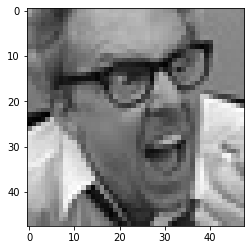

In [5]:
plt.imshow(img_array) #BGR

In [6]:
Datadirectory ="Training/" #training dataset

In [7]:
Classes = ["0","1","2","3","4","5","6"] #list of classes = exact name of the folders

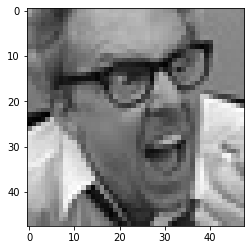

In [8]:
for category in Classes:
    path = os.path.join(Datadirectory, category)
    for img in os.listdir(path):
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

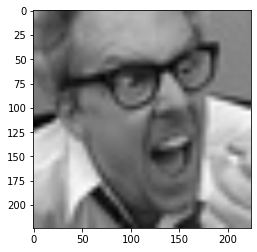

In [9]:
img_size = 224 
new_array = cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
new_array.shape

(224, 224, 3)

In [11]:
training_Data = [] ## data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory,category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array,(img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                pass

In [12]:
create_training_Data()

KeyboardInterrupt: 

In [13]:
print(len(training_Data))

13233


In [14]:
import random

random.shuffle(training_Data)

In [15]:
X = [] # data/feature
y = [] # label

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
X = np.array(X).reshape(-1, img_size, img_size, 3) # converting it to 4 dimensions

In [16]:
X.shape

(13233, 224, 224, 3)

In [18]:
# normalize the data
X = X/255.0;  

In [19]:
type(y)

list

In [20]:
y[0]

3

In [21]:
Y = np.array(y)

In [22]:
Y.shape

(13233,)

# deep learning model for training

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [24]:
model = tf.keras.applications.MobileNetV2() # pre-trained Model

In [25]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

# Transfer learning - Tuning, weights will start from last check point

In [26]:
base_input = model.layers[0].input

In [27]:
base_output = model.layers[-2].output

In [28]:
base_output

<KerasTensor: shape=(None, 1280) dtype=float32 (created by layer 'global_average_pooling2d')>

In [29]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation = 'softmax')(final_output)

In [30]:
final_output

<KerasTensor: shape=(None, 7) dtype=float32 (created by layer 'dense_2')>

In [31]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [32]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                                             

 block_3_expand_relu (ReLU)     (None, 56, 56, 144)  0           ['block_3_expand_BN[0][0]']      
                                                                                                  
 block_3_pad (ZeroPadding2D)    (None, 57, 57, 144)  0           ['block_3_expand_relu[0][0]']    
                                                                                                  
 block_3_depthwise (DepthwiseCo  (None, 28, 28, 144)  1296       ['block_3_pad[0][0]']            
 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 28, 28, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_d

 lization)                                                                                        
                                                                                                  
 block_7_expand (Conv2D)        (None, 14, 14, 384)  24576       ['block_6_project_BN[0][0]']     
                                                                                                  
 block_7_expand_BN (BatchNormal  (None, 14, 14, 384)  1536       ['block_7_expand[0][0]']         
 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 14, 14, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 14, 14, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)    

                                                                                                  
 block_10_depthwise_relu (ReLU)  (None, 14, 14, 384)  0          ['block_10_depthwise_BN[0][0]']  
                                                                                                  
 block_10_project (Conv2D)      (None, 14, 14, 96)   36864       ['block_10_depthwise_relu[0][0]']
                                                                                                  
 block_10_project_BN (BatchNorm  (None, 14, 14, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 14, 14, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_

 block_14_depthwise (DepthwiseC  (None, 7, 7, 960)   8640        ['block_14_expand_relu[0][0]']   
 onv2D)                                                                                           
                                                                                                  
 block_14_depthwise_BN (BatchNo  (None, 7, 7, 960)   3840        ['block_14_depthwise[0][0]']     
 rmalization)                                                                                     
                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 7, 7, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 7, 7, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_

In [33]:
new_model.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [34]:
new_model.fit(X,Y, epochs = 15) # training 

MemoryError: Unable to allocate 7.42 GiB for an array with shape (13233, 224, 224, 3) and data type float32

In [2]:
new_model.save('Final_model_64p35.h5')

NameError: name 'new_model' is not defined

In [10]:
new_model = tf.keras.models.load_model('Final_model_64p35.h5')

In [2]:
frame = cv2.imread("happy-boy.jpg")

In [3]:
frame.shape

(232, 300, 3)

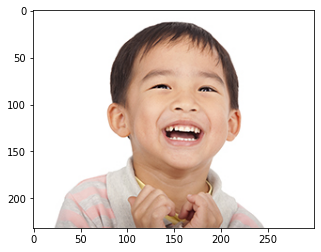

In [4]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

# we need face detection algorithm (gray images)

In [5]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [6]:
gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [7]:
gray.shape

(232, 300)

In [8]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2) # BGR
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) ==0:
        print("Face not detected")
    else: 
        for(ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

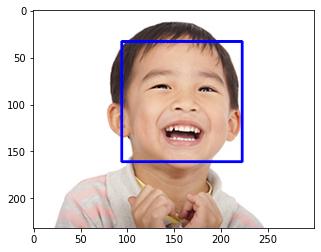

In [11]:
plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

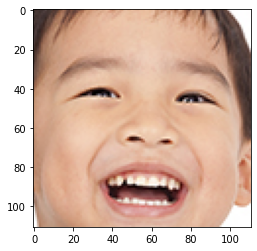

In [12]:
plt.imshow(cv2.cvtColor(face_roi, cv2.COLOR_BGR2RGB))

In [13]:
final_image = cv2.resize(face_roi,(224,224))
final_image = np.expand_dims(final_image,axis =0) ## neeed four dimensions
final_image = final_image/255.0 ## normalizing

In [14]:
Predictions = new_model.predict(final_image)

In [15]:
Predictions[0]

array([0.2436996 , 0.07772554, 0.04747802, 0.19674772, 0.09673493,
       0.20474218, 0.13287212], dtype=float32)

In [16]:
np.argmax(Predictions)

0

# VIDEO DEMO

In [13]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
import cv2
import matplotlib.pyplot as plt
import numpy as np
path = "haarcascade_frontface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)

img = np.zeros((500,500))

text = "Some text in a box!"

(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]
 
text_offset_x = 10
text_offset_y = img.shape[0] - 25
box_coords = ((text_offset_x, text_offset_y),(text_offset_x + text_width + 2, text_offset_y - text_height -2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness =1)

cap = cv2.VideoCapture(0)
if not cap.isOpened():
     cap = cv2.VideoCapture(0)
if not cap.isOpened():
     raise IOError("Cannot open webcam")
                                            
while True:
    ret, frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml') 
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)   
    print("1")                                 
    print(faces)                                  
    for x,y,w,h  in faces: 
        print("2")
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w] 
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
            print("3")  
            print("Face not detected")  
            break                           
        else: 
            print("4")  
            for(ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew]
    print("5")  
    final_image = cv2.resize(face_roi,(224,224))
    final_image = np.expand_dims(final_image,axis =0)
    final_image = final_image/255.0
                                            
    font = cv2.FONT_HERSHEY_SIMPLEX
                                            
    Predictions = new_model.predict(final_image)
                                            
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
                                            
                                            
    if (np.argmax(Predictions)==0):
        status = "Angry"     
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))  
                                            
    elif (np.argmax(Predictions)==1):
        status = "Disgust"    
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))                                      
                                            
    elif (np.argmax(Predictions)==2):
        status = "Fear"  
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))                                     
                                            
    elif (np.argmax(Predictions)==3):
        status = "Happy"    
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))                                     
                                            
    elif (np.argmax(Predictions)==4):
        status = "Sad"   
        
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))        
                                            
    elif (np.argmax(Predictions)==5):
        status = "Surpise"    
            
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1),(x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))                                   
                                            
    else:
        status = "Neutral"    
            
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame,(x1,x1), (x1 +w1, y1+h1),(0,0,0), -1)                                
        cv2.putText(frame,status,(x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255),2)                                 
        cv2.putText(frame,status,(100,150), font, 3,(0,0,255),2,cv2.LINE_4)       
        cv2.rectangle(frame,(x,y),(x+w, y+h), (0,0,225))                                  
                                            
    cv2.imshow('Face Emotion Recognition',frame)
                                            
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break                            
                                            
cap.release()                                            
cv2.destroyAllWindows()                                            

1
[[322  76 140 140]]
2
4
5
1
[[499 386  53  53]
 [322  74 141 141]]
2
4
2
4
5
1
[[503 391  58  58]
 [325  72 143 143]]
2
4
2
4
5
1
[[501 389  60  60]
 [321  73 144 144]]
2
3
Face not detected
5
1
[[320  73 144 144]]
2
4
5
1
[[502 390  57  57]
 [319  75 141 141]]
2
3
Face not detected
5
1
[[503 389  59  59]
 [319  74 140 140]]
2
3
Face not detected
5
1
[[336  77 130 130]]
2
4
5
1
[[331  74 138 138]]
2
4
5
1
[[310  78 140 140]]
2
4
5
1
[[302  76 144 144]]
2
4
5
1
[[301  74 145 145]]
2
4
5
1
[[299  75 141 141]]
2
4
5
1
[[298  74 139 139]]
2
4
5
1
[[292  69 144 144]]
2
4
5
1
[[285  61 144 144]]
2
4
5
1
[[288  66 142 142]]
2
4
5
1
[[290  73 144 144]]
2
4
5
1
[[285  83 144 144]]
2
4
5
1
[[288  86 145 145]]
2
4
5
1
[[299  84 148 148]]
2
4
5
1
[[305  85 149 149]]
2
4
5
1
[[314  82 157 157]]
2
4
5
1
[[327  79 157 157]]
2
4
5
1
[[363  74 138 138]]
2
4
5
1
[[523 387  48  48]
 [419 158  55  55]]
2
3
Face not detected
5
1
()
5
1
()
5
1
()
5
1
[[524 385  41  41]]
2
3
Face not detected
5
1
()
5
1
[[